In [1]:
"""
IOC11 Practice Module
Student Name: Caroline Lau Campbell
Student ID: 25419552

Project brief 1: Supermarket Delta Data Processing Business Intelligence Insight

"We are Supermarket Delta, our Sales and Marketing Team want to use the data gathered on customer behaviour (see Supermarket Delta Data Excel Document) to make more informed decisions to increase conversions. We want to understand how our supermarket has been performing over the last year and what we can do to improve sales in 2020."

"Task A: Prepare and wrangle the data to summarise the supermarket's performance over the past year 2019. Call out any interesting findings."
"Task B: Use Machine Learning or advanced analytical methods to predict the supermarket's busiest day for 2020."

"Present your response to brief objective. Remember you are speaking to a non-technical director. The presentation should last 6 minutes with 4 minutes for Q&As."
"""

# import statements
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker

# colour schemes
col2 = ['#FFDF00', '#C3C3C3']  # gold, silver
col2rev = ['#C3C3C3', '#FFDF00']  # silver, gold
col3 = ['#FFDF00', '#C3C3C3', '#CD8032']  # gold, silver, and bronze
col3rev = ['#CD8032', '#C3C3C3', '#FFDF00']  # bronze, silver, and gold

In [2]:
# data preparation

df = pd.read_csv('delta.csv')  # load supplied CSV db into dataframe

# Add numerical month to dataset e.g. 1
month_list = []  # var to hold months from mm/dd/yyyy date strings
for i in range(df.shape[0]):  # iterate over all rows
    month = int(str(df['Date'][i]).split('/')[0])  # get first 1-2 digits from date str as int
    month_list.append(str(month))  # append month str to list
df['Month'] = month_list  # assign month list as new column

# Add numerical day to dataset e.g. 28
day_list = []  # var to hold days from mm/dd/yyyy date strings
for i in range(df.shape[0]):  # iterate over all rows
    day = int(str(df['Date'][i]).split('/')[1])  # get second 1-2 digits from date str as int
    day_list.append(str(day))  # append day str to list
df['Day'] = day_list  # assign day list as new column

# Add weekday name and int to dataset e.g. Monday and 0, Tuesday and 1
weekday_number_list = []  # var to hold days (num) from mm/dd/yyyy date strings
weekday_name_list = []  # var to hold days (name) from mm/dd/yyyy date strings
for i in range(df.shape[0]):  # iterate over all rows
    num = pd.to_datetime(df['Date'][i]).weekday()
    name = pd.to_datetime(df['Date'][i]).day_name()
    weekday_number_list.append(str(num))  # append weekday number str to list
    weekday_name_list.append(str(name))
df['Weekday Number'] = weekday_number_list  # assign day num list as new column
df['Weekday Name'] = weekday_name_list  # assign day name list as new column

# Add numerical hour to dataset e.g. 13
hour_list = []  # var to hold hour from hh:mm time strings
for i in range(df.shape[0]):  # iterate over all rows
    hour_number = pd.to_datetime(df['Time'][i]).hour
    hour_list.append(str(hour_number))  # append hour number str to list
df['Hour'] = hour_list  # assign hour list as new column

df['Date'] = pd.to_datetime(df['Date'])  # set Date to datetime format

In [3]:
# ppt slide 1 - title slide

# ppt slide 2

print('Total profit:', df['Gross Income'].sum())
print(df.groupby(['Gender'])['Gender'].count())
print(df.groupby(['Customer Type'])['Customer Type'].count())
print('Total quantity sold:', df['Quantity'].sum())
print(df.groupby(['Payment'])['Payment'].count())
print(df.groupby(['Product Line'])['Invoice ID'].count())

Total profit: 15379.368999999999
Gender
Female    501
Male      499
Name: Gender, dtype: int64
Customer Type
Member    501
Normal    499
Name: Customer Type, dtype: int64
Total quantity sold: 5510
Payment
Cash           344
Credit card    311
Ewallet        345
Name: Payment, dtype: int64
Product Line
Electronic accessories    170
Fashion accessories       178
Food and beverages        174
Health and beauty         152
Home and lifestyle        160
Sports and travel         166
Name: Invoice ID, dtype: int64


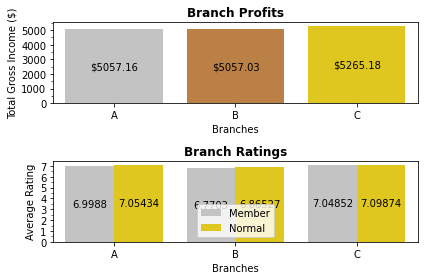

In [4]:
# ppt slide 3

# Most profitable branch - C
fig, ax = plt.subplots(2, 1)
plt.subplot(2, 1, 1)
plt.title('Branch Profits', fontweight='bold')
df_gross_income = df.groupby(['Branch'])['Gross Income'].sum().reset_index()
ax = sns.barplot(x='Branch', y='Gross Income', data=df_gross_income, palette=['#C3C3C3', '#CD8032', '#FFDF00'])
ax.bar_label(ax.containers[0], label_type='center', fmt='$%g')
ax.yaxis.set_major_locator(ticker.MultipleLocator(1000))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(500))
plt.xlabel('Branches')
plt.ylabel('Total Gross Income ($)')
plt.subplot(2, 1, 2)
plt.title('Branch Ratings', fontweight='bold')
ax = sns.barplot(x='Branch', y='Rating', hue='Customer Type', data=df, ci=None,
                 order=['A', 'B', 'C'], palette=col2rev)
ax.bar_label(ax.containers[0], label_type='center')
ax.bar_label(ax.containers[1], label_type='center')
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.5))
plt.legend(loc='lower center')
plt.xlabel('Branches')
plt.ylabel('Average Rating')
plt.tight_layout()
# plt.savefig('top_branch.png')  # graph 1
plt.show()

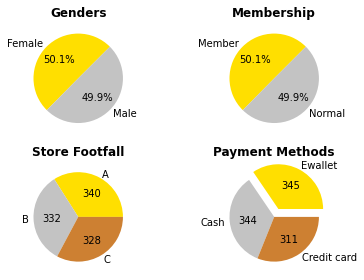

In [5]:
# ppt slide 4

# Customer demographics
plt.subplot(2, 2, 1)
foo = df['Gender'].value_counts()
plt.pie(foo, autopct=lambda p: f'{p:.1f}%', labels=foo.index, startangle=45, colors=col2)
plt.title('Genders', fontweight='bold')
plt.subplot(2, 2, 2)
foo = df['Customer Type'].value_counts()
plt.pie(foo, autopct=lambda p: f'{p:.1f}%', labels=foo.index, startangle=45, colors=col2)
plt.title('Membership', fontweight='bold')
plt.subplot(2, 2, 3)
foo = df.sort_values('Branch').groupby(['Branch'])['Branch'].count()
plt.pie(foo, autopct=lambda p: round(p*10), labels=foo.index, colors=col3)
plt.title('Store Footfall', fontweight='bold')
plt.subplot(2, 2, 4)
foo = df['Payment'].value_counts()
plt.pie(foo, autopct=lambda p: round(p*10), labels=foo.index, colors=col3, explode=[0.2, 0, 0])
plt.title('Payment Methods', fontweight='bold')
plt.tight_layout()
# plt.savefig('customer_percentages.png')  # graph 2
plt.show()

Gender
Female    15.956936
Male      14.799487
Name: Gross Income, dtype: float64
Customer Type
Member    15.609110
Normal    15.148707
Name: Gross Income, dtype: float64
Customer Type  Gender
Member         Female    16.082274
               Male      15.094544
Normal         Female    15.820631
               Male      14.526075
Name: Gross Income, dtype: float64


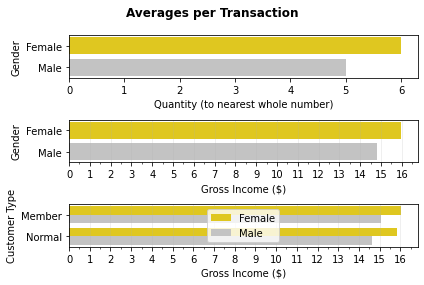

In [6]:
# ppt slide 5

# Most valuable customers - females and members
y1 = df.groupby(['Gender'])['Quantity'].mean().round(0).reset_index()
y2 = df.groupby(['Gender'])['Gross Income'].mean().reset_index()
plt.suptitle('Averages per Transaction', fontweight='bold')
plt.subplot(3, 1, 1)
ax1 = sns.barplot(y='Gender', x='Quantity', data=y1, orient='h', palette=col2)
ax1.set_xlabel('Quantity (to nearest whole number)')
plt.subplot(3, 1, 2)
ax2 = sns.barplot(y='Gender', x='Gross Income', data=y2, orient='h', palette=col2)
print(df.groupby(['Gender'])['Gross Income'].mean())
ax2.set_xlabel('Gross Income ($)')
ax2.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax2.xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
plt.grid(axis='x', alpha=0.25)
plt.subplot(3, 1, 3)
foo = df.groupby(['Customer Type', 'Branch', 'Gender'])['Gross Income'].mean().reset_index()
print(df.groupby(['Customer Type'])['Gross Income'].mean())
print(df.groupby(['Customer Type', 'Gender'])['Gross Income'].mean())
ax3 = sns.barplot(y='Customer Type', x='Gross Income',
                  data=foo, ci=None, palette=col2, orient='h', hue='Gender')
ax3.set_xlabel('Gross Income ($)')
ax3.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax3.xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
plt.grid(axis='x', alpha=0.25)
plt.legend(loc=10)
plt.tight_layout()
# plt.savefig('female_profit_trends.png')  # graph 3
plt.show()

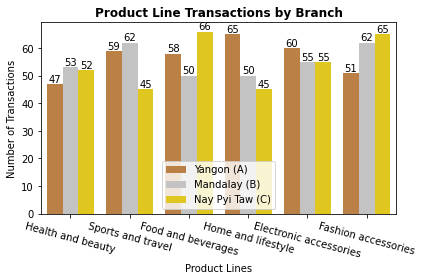

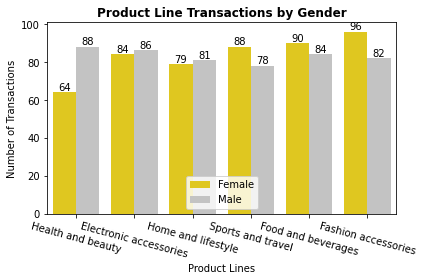

In [7]:
# ppt slides 6 and 7

# Product line popularity across branches
ax = sns.countplot(x='Product Line', hue='Branch', data=df.sort_values('Branch'), palette=col3rev)
plt.title('Product Line Transactions by Branch', fontweight='bold')
plt.xlabel('Product Lines')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=-15)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.legend([ax.containers[0], ax.containers[1], ax.containers[2]],
           ['Yangon (A)', 'Mandalay (B)', 'Nay Pyi Taw (C)'], loc='lower center')
plt.tight_layout()
# plt.savefig('product_line_transactions.png')  # graph 4
plt.show()
# Product line popularity by gender
ax = sns.countplot(x='Product Line', hue='Gender', data=df, palette=col2)
plt.title('Product Line Transactions by Gender', fontweight='bold')
plt.xlabel('Product Lines')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=-15)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.legend(loc='lower center')
plt.tight_layout()
# plt.savefig('product_popularity_by_gender.png')  # graph 5
plt.show()

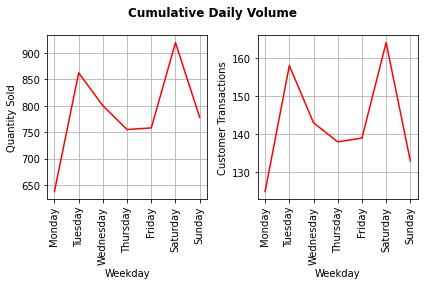

In [8]:
# ppt slide 8 - interim narrative

# ppt slide 9

# Cumulative daily trade
y2 = df.groupby(['Weekday Number', 'Weekday Name'])['Invoice ID'].count().reset_index()
y1 = df.groupby(['Weekday Number', 'Weekday Name'])['Quantity'].sum().reset_index()
plt.suptitle('Cumulative Daily Volume', fontweight='bold')
plt.subplot(1, 2, 1)
ax1 = sns.lineplot(x='Weekday Name', y='Quantity', data=y1, color='r')
plt.ylabel('Quantity Sold')
plt.xlabel('Weekday')
plt.xticks(rotation=90)
plt.grid()
plt.subplot(1, 2, 2)
ax2 = sns.lineplot(x='Weekday Name', y='Invoice ID', data=y2, color='r')
plt.ylabel('Customer Transactions')
plt.xlabel('Weekday')
plt.xticks(rotation=90)
plt.grid()
plt.tight_layout()
# plt.savefig('cum_daily_vol.png')  # graph 6
plt.show()

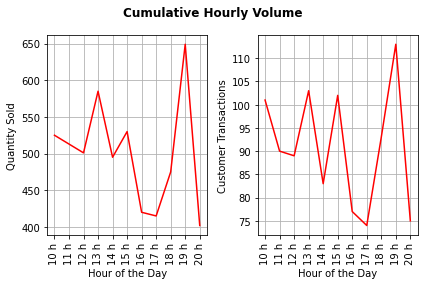

In [9]:
# ppt slide 10

# Cumulative hourly trade
y2 = df.groupby(['Hour'])['Invoice ID'].count().reset_index()
y1 = df.groupby(['Hour'])['Quantity'].sum().reset_index()
hours = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
plt.suptitle('Cumulative Hourly Volume', fontweight='bold')
plt.subplot(1, 2, 1)
ax1 = sns.lineplot(x=hours, y='Quantity', data=y1, color='r')
plt.ylabel('Quantity Sold')
plt.xlabel('Hour of the Day')
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d h'))
plt.xticks(rotation=90)
plt.grid()
plt.subplot(1, 2, 2)
ax2 = sns.lineplot(x=hours, y='Invoice ID', data=y2, color='r')
plt.ylabel('Customer Transactions')
plt.xlabel('Hour of the Day')
ax2.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax2.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d h'))
plt.xticks(rotation=90)
plt.grid()
plt.tight_layout()
# plt.savefig('cum_hourly_vol.png')  # graph 7
plt.show()

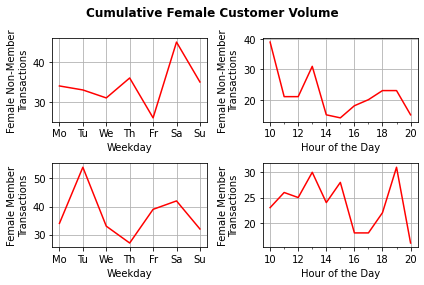

In [10]:


# ppt slide 11 - narrative conclusions

# ppt slide 12

# Cumulative female trade
fig, ax = plt.subplots(2, 2)
plt.suptitle('Cumulative Female Customer Volume', fontweight='bold')
df_non = df.loc[df['Customer Type'] == 'Normal']
df_fem = df_non.loc[df_non['Gender'] == 'Female']
hours = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
days = ['Mo', 'Tu', 'We', 'Th', 'Fr', 'Sa', 'Su']
plt.subplot(2, 2, 1)  # Female/Day
foo = df_fem.groupby(['Weekday Number', 'Weekday Name'])['Invoice ID'].count().reset_index()
ax1 = sns.lineplot(x='Weekday Name', y='Invoice ID', data=foo, color='r')
plt.ylabel('Female Non-Member\nTransactions')
ax1.set_xticks(range(0, 7))
ax1.set_xticklabels(days)
plt.xlabel('Weekday')
plt.grid()
plt.subplot(2, 2, 2)  # Female/Hour
foo = df_fem.groupby(['Hour'])['Invoice ID'].count().reset_index()
ax2 = sns.lineplot(x=hours, y='Invoice ID', data=foo, color='r')
ax2.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax2.xaxis.set_minor_locator(ticker.MultipleLocator(1))
plt.ylabel('Female Non-Member\nTransactions')
plt.xlabel('Hour of the Day')
plt.grid()
plt.subplot(2, 2, 3)  # Female Members/Day
df_mem = df.loc[df['Customer Type'] == 'Member']
df_mem_fem = df_mem.loc[df_mem['Gender'] == 'Female']
foo = df_mem_fem.groupby(['Weekday Number', 'Weekday Name'])['Invoice ID'].count().reset_index()
ax3 = sns.lineplot(x='Weekday Name', y='Invoice ID', data=foo, color='r')
ax3.set_xticks(range(0, 7))
ax3.set_xticklabels(days)
plt.xlabel('Weekday')
plt.ylabel('Female Member\nTransactions')
plt.grid()
plt.subplot(2, 2, 4)  # Female Members/Hour
foo = df_mem_fem.groupby(['Hour'])['Invoice ID'].count().reset_index()
ax4 = sns.lineplot(x=hours, y='Invoice ID', data=foo, color='r')
ax4.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax4.xaxis.set_minor_locator(ticker.MultipleLocator(1))
plt.ylabel('Female Member\nTransactions')
plt.xlabel('Hour of the Day')
plt.grid()
plt.tight_layout()
# plt.savefig('cum_fem_vol.png')  # graph 8
plt.show()

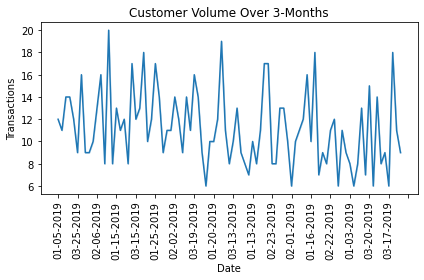

In [11]:
# ppt bonus slide - to be used in accordance with remaining presentation time

df['Sales'] = df.groupby('Date')['Date'].transform('count')
cols = ['Sales', 'Month', 'Day', 'Date']
df = df[cols]
df['Year'] = '2019'
df = df.sort_values('Date')

plt.title('Customer Volume Over 3-Months')
foo = df
foo['Date'] = pd.to_datetime(foo['Date'])
foo['Date'] = foo['Date'].dt.strftime('%m-%d-%Y')
foo = df.sort_values(by='Date')
ax = sns.lineplot(x=foo['Date'], y=df['Sales'])
plt.ylabel('Transactions')
plt.xlabel('Date')
plt.xticks(rotation=90)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
# ax.bar_label(ax.containers[0], size=3)
plt.tight_layout()
# plt.savefig('idk.png')  # bonus graph 9
plt.show()